## The Testing Notebook used to run all of the tests from cryptoguard.py

### Note: If this is run on MyBinder the AndroidSDK is not yet setup thus Android tests will all fail

In [1]:
import sys;

version = str(sys.version[0])
print('Python Version: ' + version)
if version == '2':
    print('This script requires python3')
    sys.exit(0)
#Only run this once
import os;os.chdir('../')

Python Version: 3


In [2]:
def getVersion(env):
    java_var = {}
    with open(os.path.join(os.environ[env],'release'), 'r') as foil:
            for line in [x for x in foil if '=' in x]:
                name, value = line.split('=',1)
                java_var[name.strip().replace('"','')] = value.strip().replace('"','')
    return java_var
def getMajorVersion(env):
    return int(getVersion(env)['JAVA_VERSION'].split('.')[1])

print('JAVA_HOME: ' + str(getVersion('JAVA_HOME')['JAVA_VERSION']))
print('JAVA7_HOME: ' + str(getVersion('JAVA7_HOME')['JAVA_VERSION']))

if getMajorVersion('JAVA_HOME') != 8:
    print('Cryptoguard requires Java 8 JDK')
    sys.exit(0)
if getMajorVersion('JAVA7_HOME') != 7:
    print('Cryptoguard requires access to Java 7 JDK')
    sys.exit(0)

JAVA_HOME: 1.8.0_232
JAVA7_HOME: 1.7.0


In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import cryptoguard

saveFigs = False
plotNum = 0

def getBaseFig():
    global plotNum
    plotNum = plotNum + 1
    return plt.figure(plotNum)

def getFig():
    return getBaseFig().add_subplot(111)

In [4]:
liveTests, skippedTests, grouping = cryptoguard.TestUtils.getHelpTests()

groupLive = sum([grouping[x]['Active'] for x in grouping.keys()])
groupSkip = sum([grouping[x]['Skipped'] for x in grouping.keys()])
grouping['Other'] = {
    'Active':liveTests - groupLive,
    'Skipped':skippedTests - groupSkip
}

<IPython.core.display.Javascript object>


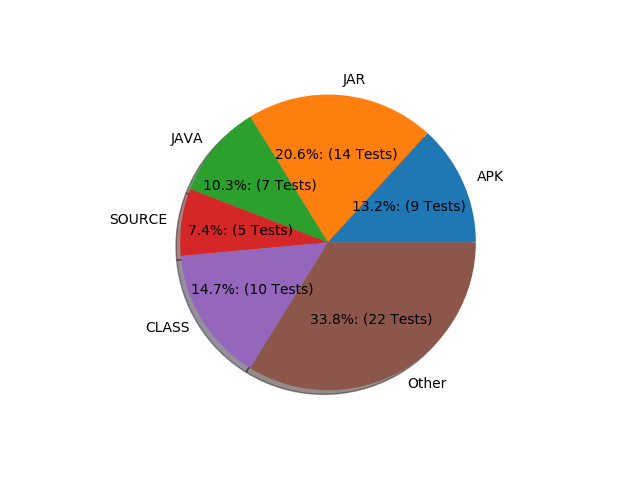

In [5]:
activeTests = [int(grouping[x]['Active']) for x in grouping.keys()]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%: ({:d} Tests)".format(pct, absolute)

axss = getFig()
wedges, texts, autotexts = axss.pie(activeTests, 
                                    labels=grouping.keys(), 
                                    autopct=lambda pct: func(pct, activeTests), 
                                    shadow=True, 
                                    startangle=0)

<IPython.core.display.Javascript object>


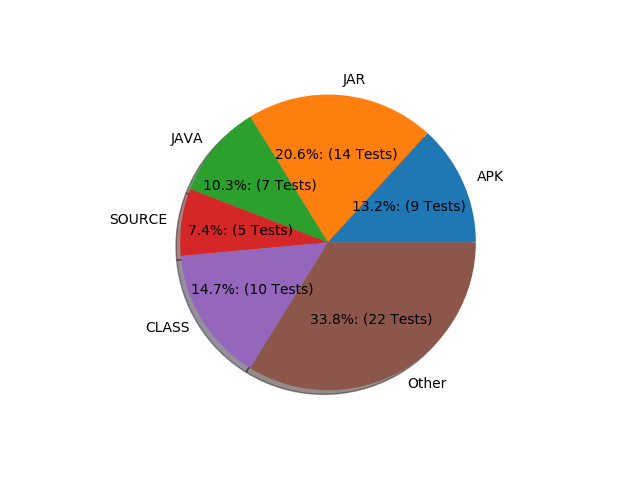

In [6]:
totalTests = [int(grouping[x]['Active']) + int(grouping[x]['Skipped']) for x in grouping.keys()]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%: ({:d} Tests)".format(pct, absolute)

axss = getFig()
wedges, texts, autotexts = axss.pie(totalTests, 
                                    labels=grouping.keys(), 
                                    autopct=lambda pct: func(pct, totalTests), 
                                    shadow=True, 
                                    startangle=0)

In [7]:
cryptoguard.TestUtils.test(passedtests='EntryPointTest_APK.main_TestableApk_Default')

Running the test: EntryPointTest_APK.main_TestableApk_Default
Passed


In [8]:
#Running the tests
streamTests = False
testResults = cryptoguard.TestUtils.tests()

Running all of the available tests.
01/68 | AnalyzerReportTest.simpleTest_1 | Pass | S:10
02/68 | ArgumentsCheckTest.testEnvironmentVariables | Pass | S:10
03/68 | ArgumentsCheckTest.parameterCheck_verifyingJavaSevenHome | Pass | S:13
04/68 | ArgumentsCheckTest.parameterCheck_verifyingJavaAndroidHome | Pass | S:11
05/68 | ArgumentsCheckTest.parameterCheck_VersionOut | Pass | S:11
06/68 | ArgumentsCheckTest.paramaterCheck_jar_enhancedInputFile | Pass | S:11
07/68 | ArgumentsCheckTest.paramaterCheck_jar_SkipValidation | Pass | S:12
08/68 | ArgumentsCheckTest.paramaterCheck_jar | Pass | S:11
09/68 | ArgumentsCheckTest.paramaterCheck_Barejar | Pass | S:12
10/68 | ArgumentsCheckTest.parameterCheck_gdl | Pass | S:12
11/68 | CWEListTest.sampleTestOne | Pass | S:10
12/68 | EntryPointTest_APK.main_TestableApk_Legacy | Pass | S:19
13/68 | EntryPointTest_APK.main_TestableApk_Legacy_Stream | Pass | S:24
14/68 | EntryPointTest_APK.main_TestableApk_Scarf | Pass | S:20
15/68 | EntryPointTest_APK.main

In [9]:
replica = {
            'APK': {},
            'JAR': {},
            'JAVA': {},
            'SOURCE': {},
            'CLASS': {},
            'OTHER':{}
        }
#results = {
    #'APK': {
        #'Pass':[
            #{
                #'name': name,
                #'timeTaken':time,
                #'timesReRun':timeReRun
            #},
        #],
        #'Fail':[
            #{
                #'name': name,
                #'timeTaken':time,
                #'timesReRun':timeReRun
            #},
        #],
        #'Skip':[
            #{
                #'name': name,
                #'timeTaken':time,
                #'timesReRun':timeReRun
            #},
        #]
    #}
#},
for key, value in testResults.items():
    passArr = [int(x['timeTaken']) for x in value['Pass']]
    replica[key]['PassCount'] = len(passArr)
    replica[key]['PassTime'] = sum(passArr)
    
    failArr = [int(x['timeTaken']) for x in value['Fail']]
    replica[key]['FailCount'] = len(failArr)
    replica[key]['FailTime'] = sum(failArr)
    
    replica[key]['Skipped'] = len([x for x in value['Skip']])


<IPython.core.display.Javascript object>


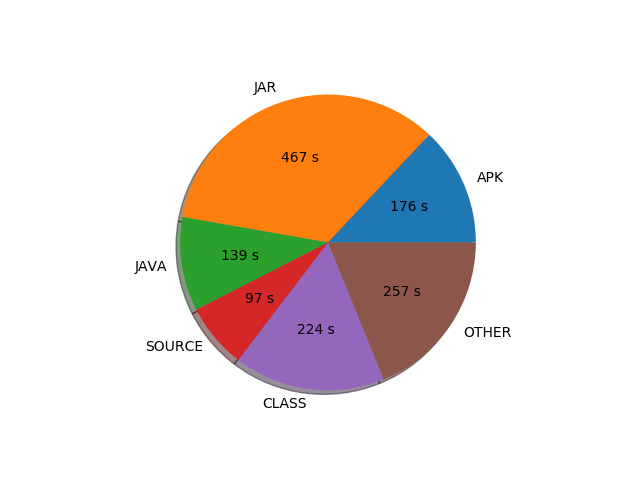

In [10]:
totalTime = [int(replica[x]['PassTime'] + replica[x]['FailTime']) for x in replica.keys()]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d} s".format(absolute)

axss = getFig()
wedges, texts, autotexts = axss.pie(totalTime, 
                                    labels=replica.keys(), 
                                    autopct=lambda pct: func(pct, totalTime), 
                                    shadow=True, 
                                    startangle=0)


<IPython.core.display.Javascript object>


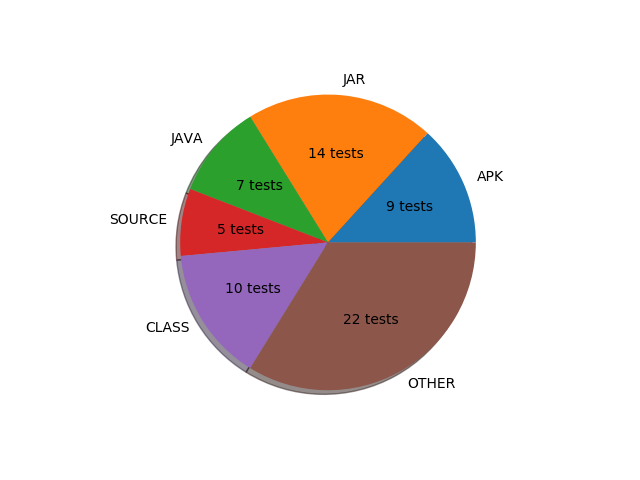

In [11]:
totalCounts = [int(replica[x]['PassCount'] + replica[x]['FailCount']) for x in replica.keys()]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d} tests".format(absolute)

axss = getFig()
wedges, texts, autotexts = axss.pie(totalCounts, 
                                    labels=replica.keys(), 
                                    autopct=lambda pct: func(pct, totalCounts), 
                                    shadow=True, 
                                    startangle=0)

<IPython.core.display.Javascript object>


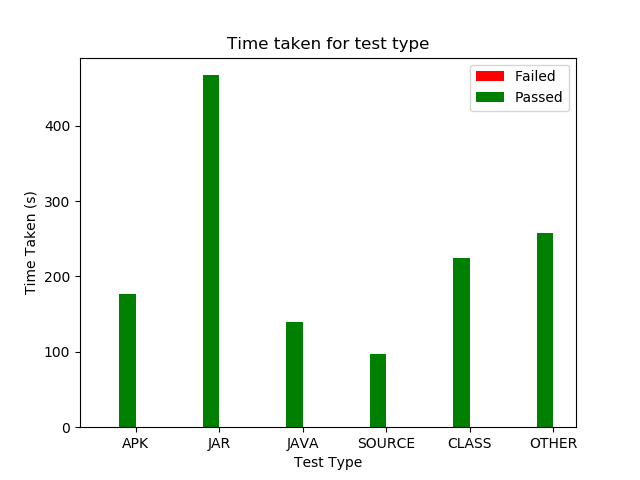

In [12]:
groups = np.arange(len(replica.keys()))
groupwidth = .2
trend = 50
rangeLine = range(0, 100)

Passed = [float(replica[x]['PassTime']) for x in replica.keys()]
#ant.reverse()

Failed = [float(replica[x]['FailTime']) for x in replica.keys()]
#sbt.reverse()

ax = getFig()

plt.bar(groups + (groupwidth*0), Failed, color='red', width=groupwidth, label='Failed')
plt.bar(groups + (groupwidth*1), Passed, color='green', width=groupwidth, label='Passed')

plt.legend(loc='best')
ax.set_title("Time taken for test type")
ax.set_xticks([x + groupwidth*1.5 for x in np.arange(6)])
ax.set_xticklabels(replica.keys())
ax.set_xlabel('Test Type')
ax.set_ylabel('Time Taken (s)')
plt.show()
if saveFigs:
    plt.savefig('Resources/Imgs/BuildToolTrend.png')

<IPython.core.display.Javascript object>


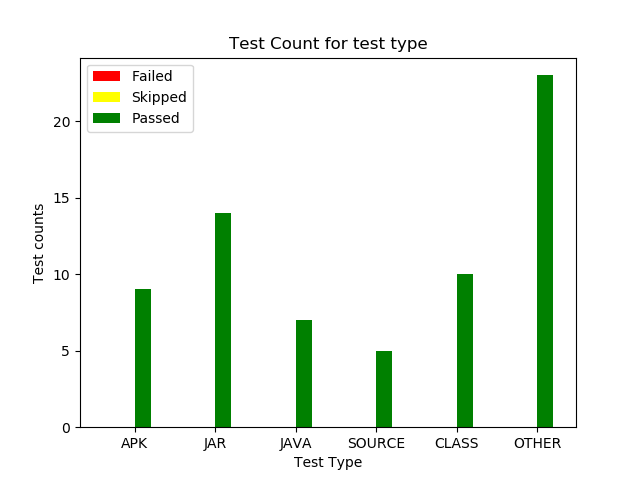

In [13]:
groups = np.arange(len(replica.keys()))
groupwidth = .2
trend = 50
rangeLine = range(0, 100)

Passed = [int(replica[x]['PassCount']) for x in replica.keys()]
#ant.reverse()

Skipped = [int(replica[x]['Skipped']) for x in replica.keys()]
#sbt.reverse()

Failed = [int(replica[x]['FailCount']) for x in replica.keys()]
#sbt.reverse()

ax = getFig()

plt.bar(groups + (groupwidth*0), Failed, color='red', width=groupwidth, label='Failed')
plt.bar(groups + (groupwidth*1), Skipped, color='yellow', width=groupwidth, label='Skipped')
plt.bar(groups + (groupwidth*2), Passed, color='green', width=groupwidth, label='Passed')

plt.legend(loc='best')
ax.set_title("Test Count for test type")
ax.set_xticks([x + groupwidth*1.5 for x in np.arange(6)])
ax.set_xticklabels(replica.keys())
ax.set_xlabel('Test Type')
ax.set_ylabel('Test counts')
plt.show()
if saveFigs:
    plt.savefig('Resources/Imgs/BuildToolTrend.png')

<IPython.core.display.Javascript object>


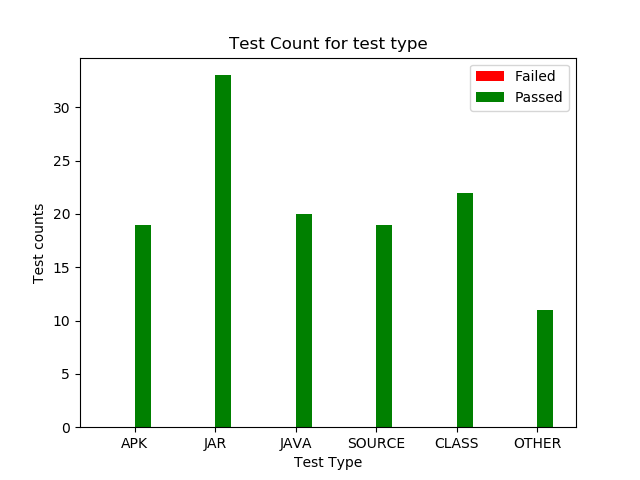

In [14]:
groups = np.arange(len(replica.keys()))
groupwidth = .2
trend = 50
rangeLine = range(0, 100)

def smartDiv(x,y):
    if y == 0:
        y = 1
    return x/y

Passed = [int(smartDiv(replica[x]['PassTime'],replica[x]['PassCount'])) for x in replica.keys()]
#ant.reverse()

Failed = [int(smartDiv(replica[x]['FailTime'],replica[x]['FailCount'])) for x in replica.keys()]
#sbt.reverse()

ax = getFig()

plt.bar(groups + (groupwidth*0), Failed, color='red', width=groupwidth, label='Failed')
plt.bar(groups + (groupwidth*2), Passed, color='green', width=groupwidth, label='Passed')

plt.legend(loc='best')
ax.set_title("Test Count for test type")
ax.set_xticks([x + groupwidth*1.5 for x in np.arange(6)])
ax.set_xticklabels(replica.keys())
ax.set_xlabel('Test Type')
ax.set_ylabel('Test counts')
plt.show()
if saveFigs:
    plt.savefig('Resources/Imgs/BuildToolTrend.png')